In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# This is for fish type B

def f(t, y, L=5.4, r=0.65):
    return r*(1-y/L)*y

def y(t, L=5.4, r=0.65, y0=2):
    return L/(1 + ((L/y0)-1)*np.exp(-r*t))

def Euler(t_start, y_start, t_end, h):
    t_meas = np.arange(t_start, t_end+h, h)
    y_meas = [y_start]
    y_old = y_start
    for ti in np.arange(t_start, t_end, h):
        y_new = y_old + f(ti, y_old)*h
        y_old = y_new
        y_meas.append(y_new)
    return np.array(y_meas), t_meas

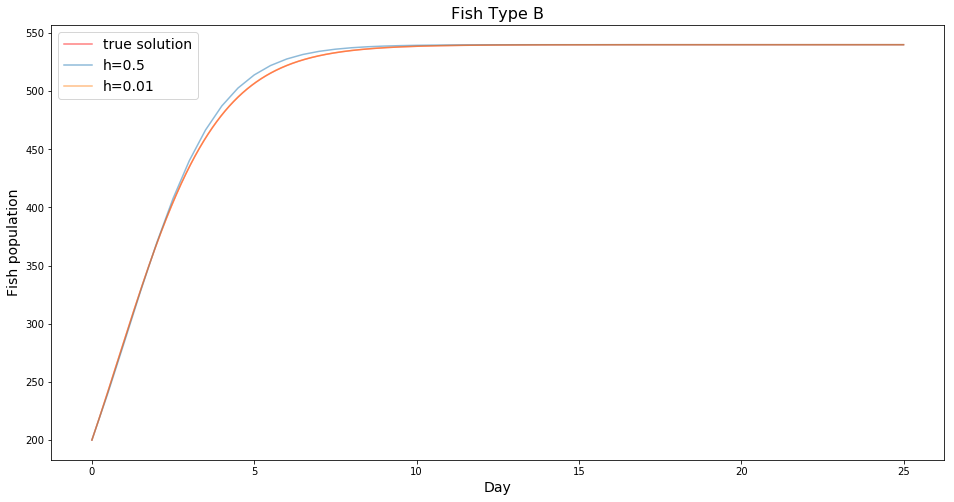

In [3]:
y1, t1 = Euler(t_start=0, y_start=2, t_end=25, h=0.5)
y2, t2 = Euler(t_start=0, y_start=2, t_end=25, h=0.01)
t_true = np.arange(0, 25+0.01, 0.01)
y_true = np.array([y(ti) for ti in t_true])
plt.figure(figsize=(16,8))
plt.plot(t_true, 100*y_true, label='true solution', alpha=0.5, color='r')
plt.plot(t1, 100*y1, label='h=0.5', alpha=0.5)
plt.plot(t2, 100*y2, label='h=0.01', alpha=0.5)
plt.legend(loc='best', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Fish population', fontsize=14)
plt.title('Fish Type B', fontsize=16)
plt.show()

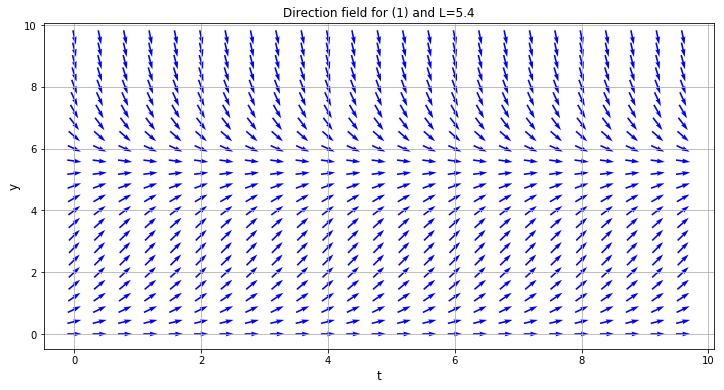

In [57]:
T, Y = np.meshgrid(np.arange(0, 10, 0.4), np.arange(0, 10, 0.4)) # Grid Points
dT = np.ones(np.shape(T)) 
dY = []
for i in range(len(Y)):
    dY.append([])
    for j in range(len(Y[i])):
        dY[i].append(f(T[i][j], Y[i][j]))
        
dY = np.array(dY)       
dT = dT/ np.sqrt(dT**2 + dY**2)
dY = dY/ np.sqrt(dT**2 + dY**2)
plt.figure(figsize=(12, 6))
plt.quiver(T, Y, dT, dY, pivot='mid', color='blue')
plt.xlabel('t', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Direction field for (1) and L=5.4', fontsize=12)
plt.grid(True)
plt.show()